<a href="https://colab.research.google.com/github/AnIsAsPe/LSM-Opciones-americanas/blob/main/Montecarlo_obtener_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import random
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def MonteCarloPi(numPuntos, decimales = 4):
    df = pd.DataFrame()
    # Generar coordenadas aleatoreas x, y de puntos,     
    df['x'] = 2*(np.random.randint(-1, 1,numPuntos)-0.5)
    df['y'] = 2*(np.random.rand( numPuntos)-0.5)

    # Distancia (x, y) al origen
    df['distancia_origen'] = np.sqrt(df['x']**2 + df['y']**2)

    # ¿El punto (x, y) está al interior del círculo?   
    df.loc[df['distancia_origen'] <= 1, 'dentro_circulo'] = True
    df.loc[df['distancia_origen'] > 1, 'dentro_circulo'] =  False
    df['estimacion_pi'] = 4*(df['dentro_circulo'] == True).cumsum()/(df.index-1)
    
    # Estimación del valor de pi
    pi_est = np.round(np.array(df['estimacion_pi'])[-1], decimales)
    piError = np.round(round(100*((pi_est - np.pi) / np.pi), 4), decimales)

    
    print('El valor de pi es aproximadamente {}.'.format(pi_est))
    print('El error respecto al verdadero valor de pi es de {}%.'.format(piError))

    #Grafica distinguiendo los puntos fuera y dentro del círculo
    plt.figure(figsize=(6,6))
    sns.scatterplot(x='x', y='y', data=df, hue='dentro_circulo', palette='colorblind')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Puntos aleatorios')
    plt.show()
    
    #Gráfica estimación de  pi vs pi
    plt.figure(figsize=(16, 6))
    plt.plot(df.index+1, df['estimacion_pi'], color='g')
    plt.axhline(y=np.pi, color='black', ls='--')
    plt.xlim(0, numPuntos+1)
    plt.ylim(2.2, 4)
    plt.xlabel('Puntos')
    plt.ylabel('Estimación de pi')
    plt.title('Estimación de pi según cantidad de puntos')
    plt.show()


#     return df

El valor de pi es aproximadamente 2.9098.
El error respecto al verdadero valor de pi es de -7.3782%.


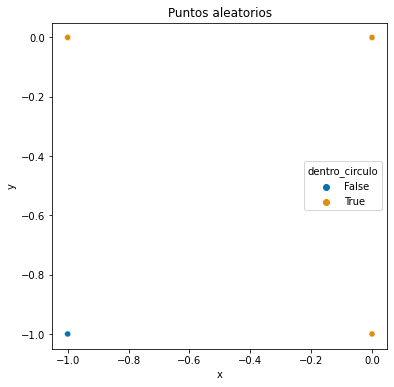

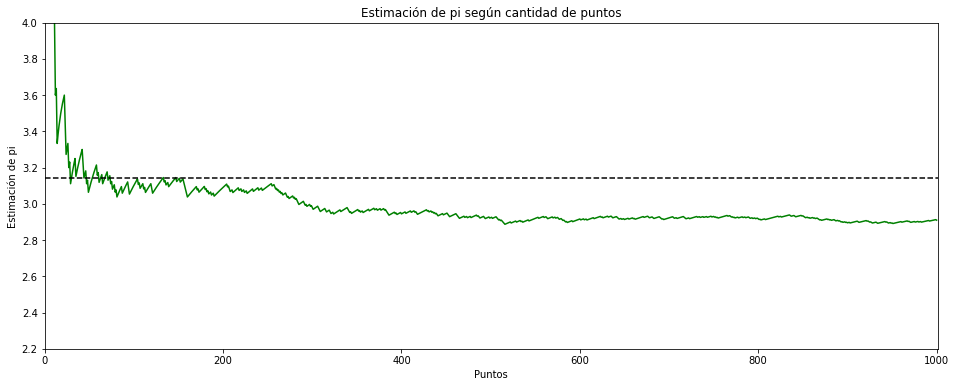

In [10]:
 MonteCarloPi(1000)